MNE & Autoreject tutorials
- [Overview of artifact detection](https://mne.tools/stable/auto_tutorials/preprocessing/10_preprocessing_overview.html)
- [Handling bad channels](https://mne.tools/stable/auto_tutorials/preprocessing/15_handling_bad_channels.html)
- [autoreject python](https://autoreject.github.io/stable/explanation.html)


In [20]:
%matplotlib inline

Channels marked as bad: none


# Overview of artifact detection

In [3]:
import os
import numpy as np
import mne

folder_name = 'D:/eeg_club/N170 Raw Data and Scripts Only/1'
filename = '1_N170.set'
sample_data_raw_file = os.path.join(folder_name, filename)
raw = mne.io.read_raw_eeglab(sample_data_raw_file, preload=True)

Reading D:\eeg_club\N170 Raw Data and Scripts Only\1\1_N170.fdt
Reading 0 ... 699391  =      0.000 ...   682.999 secs...


In [24]:
print(list(raw.info['ch_names']))
raw.info

['FP1', 'F3', 'F7', 'FC3', 'C3', 'C5', 'P3', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Oz', 'Pz', 'CPz', 'FP2', 'Fz', 'F4', 'F8', 'FC4', 'FCz', 'Cz', 'C4', 'C6', 'P4', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'HEOG_left', 'HEOG_right', 'VEOG_lower']


<Info | 7 non-empty values
 bads: []
 ch_names: FP1, F3, F7, FC3, C3, C5, P3, P7, P9, PO7, PO3, O1, Oz, Pz, CPz, ...
 chs: 33 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 1024.0 Hz
>

In [10]:
%matplotlib qt
raw.plot(duration=5, remove_dc=True);

### Power line noise

Effective window size : 2.000 (s)


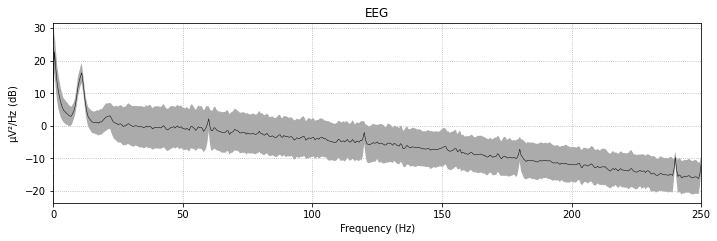

In [44]:
%matplotlib inline
fig = raw.plot_psd(tmax=np.inf, fmax=250.0, average=True) #fmax=raw.info['sfreq']/2

### Heartbeat artifacts (ECG)

In [41]:
# Can be done if ECG channel is present
# ecg_epochs = mne.preprocessing.create_ecg_epochs(raw, ch_name='Pz')
# ecg_epochs.plot_image(combine='mean')

### Ocular artifacts (EOG)

Using EOG channel: VEOG_lower
EOG channel index for this subject is: [32]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10240 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 90 significant peaks
Number of EOG events detected: 90
Not setting metadata
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
Loading data for 90 events and 1025 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
90 matc

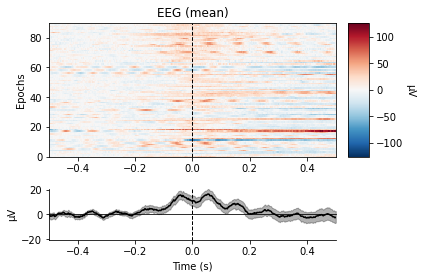

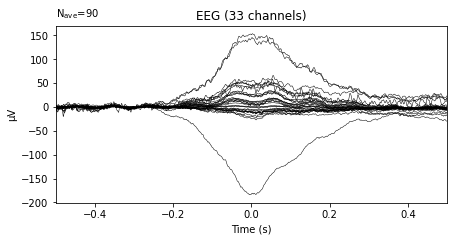

In [27]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2), ch_name='VEOG_lower')
eog_epochs.plot_image(combine='mean')
eog_epochs.average()#.plot_joint()
eog_epochs.average().plot();

Using EOG channels: HEOG_left, HEOG_right
EOG channel index for this subject is: [30 31]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10240 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 92 significant peaks
Number of EOG events detected: 92
Not setting metadata
Not setting metadata
92 matching events found
Applying baseline correction (mode: mean)
Loading data for 92 events and 1025 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting m

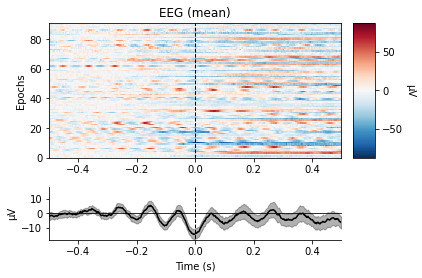

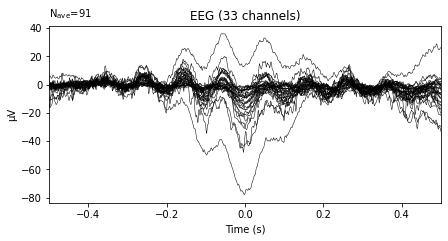

In [36]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2), ch_name=['HEOG_left', 'HEOG_right'])
# eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2), ch_name='HEOG_left')
# eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2), ch_name='HEOG_right')
eog_epochs.plot_image(combine='mean')
eog_epochs.average().plot();